In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [59]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00


In [ ]:
#https://www.youtube.com/watch?v=eMPQw7Xbjd0

In [1]:
from google.colab import drive
drive.mount("/content/drive")
import os
import pandas as pd

Mounted at /content/drive


In [1]:
import pandas as pd

In [2]:
os.chdir("/content/drive/My Drive/Nova/SEE_Project")

NameError: name 'os' is not defined

In [3]:
os.getcwd()

'/content/drive/My Drive/Nova/SEE_Project'

In [2]:
df=pd.read_csv('sentiment_dataset.csv')
# df=pd.read_csv("Clothing.csv")
df

,Unnamed: 0,sentence,label
0,0,Wow... Loved this place.,1
1,1,Crust is not good.,0
2,2,Not tasty and the texture was just nasty.,0
3,3,Stopped by during the late May bank holiday of...,1
4,4,The selection on the menu was great and so wer...,1
...,...,...,...
4996,4996,The restaurant's new chef from a Michelin-star...,0
4997,4997,The fitness boot camp's new app tracks partici...,1
4998,4998,The local theater's new experimental space all...,0
4999,4999,The annual craft fair's new live stream option...,1


In [3]:
df.isna().sum()

Unnamed: 0    0
sentence      0
label         0
dtype: int64

## Pre-processing

In [4]:
df.shape

(5001, 3)

In [5]:
df.columns

Index(['Unnamed: 0', 'sentence', 'label'], dtype='object')

In [6]:
df.label.value_counts()

label
1    2899
0    2102
Name: count, dtype: int64

In [7]:
df1=df.drop(['Unnamed: 0'],axis=1) #axis indicates that the columns should be dropped

In [8]:
df1.shape

(5001, 2)

In [9]:
df1.head()

,sentence,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [10]:
type(df1)

pandas.core.frame.DataFrame

In [11]:
x=df1['sentence']
y=df1['label']

# x=df1.iloc[:,0] #independent var
# y=df1.iloc[:,1]



In [12]:
type(x)

pandas.core.series.Series

In [13]:
x[:5]

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
Name: sentence, dtype: object

In [14]:
y[:5]

0    1
1    0
2    0
3    1
4    1
Name: label, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.12,random_state=42)

In [16]:
print("Shape of X train:",X_train1.shape)
print("Shape of X test:",X_test1.shape)
print("Shape of Y train:",y_train1.shape)
print("Shape of Y test:",y_test1.shape)

Shape of X train: (4400,)
Shape of X test: (601,)
Shape of Y train: (4400,)
Shape of Y test: (601,)


In [17]:
print(X_train1[:5])
y_train1[:5]

4351    The health workshop's expansion to include men...
1192                         I had a horrible experience.
4588    The street food market's new app-based orderin...
4511    The cinema's new film critique club encourages...
3670    The annual craft fair now includes live crafti...
Name: sentence, dtype: object


4351    1
1192    0
4588    0
4511    1
3670    1
Name: label, dtype: int64

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Create a Tokenizer object with vocabulary size of 1000
tokenizer = Tokenizer(num_words=1000, lower=True)

In [19]:
X_train1

4351    The health workshop's expansion to include men...
1192                         I had a horrible experience.
4588    The street food market's new app-based orderin...
4511    The cinema's new film critique club encourages...
3670    The annual craft fair now includes live crafti...
                              ...                        
4426    The community fair's new live music stage feat...
466     I don't think I'll be running back to Carly's ...
3092    The community center's new programs are divers...
3772    The cinema's new early bird special offers dis...
860     This place is pretty good, nice little vibe in...
Name: sentence, Length: 4400, dtype: object

In [20]:
# Convert all elements in X_train and X_test to strings
X_train2 = [str(x) for x in X_train1]
X_test2 = [str(x) for x in X_test1]

# Verify that all elements are strings
print(all(isinstance(x, str) for x in X_train2))  # Should print True if all elements are strings

True


In [21]:
X_train2[:5]

["The health workshop's expansion to include mental health topics addresses the growing awareness of mental wellness.",
 'I had a horrible experience.',
 "The street food market's new app-based ordering system reduces wait times and allows for more efficient service.",
 "The cinema's new film critique club encourages discussions and analysis of films shown at the cinema, engaging the community of film enthusiasts.",
 'The annual craft fair now includes live crafting demonstrations, offering attendees the chance to learn new skills.']

In [22]:
# Fit the Tokenizer on the training data
tokenizer.fit_on_texts(X_train2)

# Convert the text data to sequences of integers using the fitted Tokenizer
X_train3 = tokenizer.texts_to_sequences(X_train2)
X_test3 = tokenizer.texts_to_sequences(X_test2)

# Determine the vocabulary size (number of unique words)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

3897

In [23]:
X_train3[0]

[1, 19, 110, 253, 6, 123, 254, 19, 560, 650, 1, 337, 561, 7, 254, 79]

In [24]:
y_train1[:5]

4351    1
1192    0
4588    0
4511    1
3670    1
Name: label, dtype: int64

In [25]:
maxlenTrain=max(len(x) for x in X_train3)
maxlenTrain

28

In [26]:
maxlenTest=max(len(x) for x in X_test3)
maxlenTest

27

In [27]:
from keras.preprocessing.sequence import pad_sequences
maxlen=max(maxlenTest,maxlenTrain)
X_train =pad_sequences(X_train3,padding='post',maxlen=maxlen)
X_test =pad_sequences(X_test3,padding='post',maxlen=maxlen)

In [28]:
print(X_train[:5])

[[  1  19 110 253   6 123 254  19 560 650   1 337 561   7 254  79   0   0
    0   0   0   0   0   0   0   0   0   0]
 [ 12  39   5 700  42   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  1  82  10 139   3  83 310 443 208 756 181 195   2  71   8  29 524  16
    0   0   0   0   0   0   0   0   0   0]
 [  1  52   3 111 701 389 216 444   2 651   7 338 702  26   1 286 196   1
   33   7 111 114   0   0   0   0   0   0]
 [  1  20  64  88 103  43  69 106 153 264   1   6 405   3 390   0   0   0
    0   0   0   0   0   0   0   0   0   0]]


In [29]:
y_train1[:10]

4351    1
1192    0
4588    0
4511    1
3670    1
624     1
2796    1
4292    0
4969    1
233     0
Name: label, dtype: int64

In [30]:
from keras.utils import to_categorical
num_classes=2
y_train=to_categorical(y_train1,num_classes)
y_test=to_categorical(y_test1,num_classes)

print(y_train.shape)
print(y_train[0])

(4400, 2)
[0. 1.]


In [31]:
y_train[:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [32]:
y_train=y_train1
y_test=y_test1

## Model

In [33]:
#converting to 3D
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,SimpleRNN, Bidirectional, BatchNormalization,LSTM
from keras import optimizers
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
import numpy as np

X_train=np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
print(X_train.shape)

X_test=np.array(X_test).reshape((X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)

(4400, 28, 1)
(601, 28, 1)


In [34]:
# Adjust your vanilla RNN model to have a single output neuron with a sigmoid activation function
def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(100, input_shape=(maxlen, 1), return_sequences=False))  # Reduced units to prevent overfitting
    model.add(Dense(50, activation='relu'))  # Added ReLU activation
    model.add(Dense(25, activation='relu'))  # Simplified architecture
    model.add(Dense(1, activation='sigmoid'))

    # Correctly use the custom optimizer with a specified learning rate
    adam = optimizers.Adam(learning_rate=0.001)  # More typical learning rate
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [35]:
def vanilla_rnn1(learning_rate=0.001):
    model = Sequential()
    # Adding a Bidirectional RNN
    model.add(Bidirectional(SimpleRNN(100, return_sequences=True), input_shape=(maxlen, 1)))
    model.add(Dropout(0.25))
    # Adding another RNN layer
    model.add(SimpleRNN(50, return_sequences=False))
    model.add(Dropout(0.25))
    # Batch Normalization layer
    model.add(BatchNormalization())
    # More neurons in the Dense layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    # Output layer with sigmoid activation for binary classification
    model.add(Dense(1, activation='sigmoid'))
    model.summary()

    # Using a better-suited learning rate for Adam optimizer
    adam = optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [36]:
def lstm_rnn_model():
    model = Sequential()
    # Using LSTM for improved sequence modeling
    model.add(LSTM(100, input_shape=(maxlen, 1), return_sequences=False))  # LSTM with 100 units
    model.add(Dense(50, activation='relu'))  # Intermediate layer with ReLU activation
    model.add(Dense(25, activation='relu'))  # Another ReLU layer for additional processing
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

    # Configure the optimizer with a commonly used learning rate
    adam = optimizers.Adam(learning_rate=0.001)  # Optimizer with a learning rate of 0.001
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    return model

In [37]:
# Convert target values to binary format (0 or 1)
y_train_binary = np.array(y_train1)

# Create the vanilla RNN model
model = vanilla_rnn()

In [ ]:
# model.load_weights("./Clothing_weights.h5")

In [40]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
69/69 [==============================] - 3s 16ms/step - loss: 0.6792 - accuracy: 0.5786
Epoch 2/100
69/69 [==============================] - 1s 16ms/step - loss: 0.6732 - accuracy: 0.5839
Epoch 3/100
69/69 [==============================] - 1s 10ms/step - loss: 0.6710 - accuracy: 0.5852
Epoch 4/100
69/69 [==============================] - 1s 10ms/step - loss: 0.6692 - accuracy: 0.5877
Epoch 5/100
69/69 [==============================] - 1s 10ms/step - loss: 0.6708 - accuracy: 0.5811
Epoch 6/100
69/69 [==============================] - 1s 10ms/step - loss: 0.6683 - accuracy: 0.5891
Epoch 7/100
69/69 [==============================] - 1s 10ms/step - loss: 0.6676 - accuracy: 0.5857
Epoch 8/100
69/69 [==============================] - 1s 10ms/step - loss: 0.6662 - accuracy: 0.5866
Epoch 9/100
69/69 [==============================] - 1s 10ms/step - loss: 0.6660 - accuracy: 0.5877
Epoch 10/100
69/69 [==============================] - 1s 10ms/step - loss: 0.6663 - accuracy: 0.5884

In [38]:
model = lstm_rnn_model()

model.load_weights("./sentiment_weights_lstm1.h5")

In [40]:
from keras.callbacks import EarlyStopping

# Initialize the model
model = lstm_rnn_model()

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model
history = model.fit(
    X_train, y_train,
    epochs=65,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

Epoch 1/65
69/69 [==============================] - 16s 84ms/step - loss: 0.6792 - accuracy: 0.5805 - val_loss: 0.6830 - val_accuracy: 0.5541
Epoch 2/65
69/69 [==============================] - 5s 74ms/step - loss: 0.6748 - accuracy: 0.5866 - val_loss: 0.6766 - val_accuracy: 0.5541
Epoch 3/65
69/69 [==============================] - 4s 56ms/step - loss: 0.6727 - accuracy: 0.5836 - val_loss: 0.6745 - val_accuracy: 0.5574
Epoch 4/65
69/69 [==============================] - 3s 51ms/step - loss: 0.6702 - accuracy: 0.5886 - val_loss: 0.6717 - val_accuracy: 0.5657
Epoch 5/65
69/69 [==============================] - 4s 62ms/step - loss: 0.6688 - accuracy: 0.5880 - val_loss: 0.6645 - val_accuracy: 0.5707
Epoch 6/65
69/69 [==============================] - 5s 75ms/step - loss: 0.6675 - accuracy: 0.5880 - val_loss: 0.6719 - val_accuracy: 0.5691
Epoch 7/65
69/69 [==============================] - 4s 54ms/step - loss: 0.6661 - accuracy: 0.5939 - val_loss: 0.6758 - val_accuracy: 0.5624
Epoch 8/65
6

In [42]:
# model.save_weights("./sentiment_weights_lstm3.h5")

In [39]:
import numpy as np

# Define the text to be predicted
a = ["it was terrible"]

# Convert the text to sequences of integers using the tokenizer
a = tokenizer.texts_to_sequences(a)

# Pad the sequences to ensure they have the same length
a = pad_sequences(a, padding='post', maxlen=maxlen)

# Reshape the array to fit the model input shape
a = np.array(a)
a = a.reshape((a.shape[0], a.shape[1], 1))  # Reshape to (1, maxlen, 1)

print(a.shape)

(1, 28, 1)


In [40]:
prediction = model.predict(np.array(a))
print(prediction)

1/1 [==============================] - 3s 3s/step
[[0.26330099]]


In [41]:
# Threshold the probabilities to get the sentiment label
sentiment_label = 1 if prediction[0]>.5 else 0

print("Predicted sentiment label:", sentiment_label)

Predicted sentiment label: 0


In [42]:
y_pred=model.predict(np.array(X_test))
y_pred[:5]

19/19 [==============================] - 0s 13ms/step


array([[0.5695384 ],
       [0.11286671],
       [0.26274407],
       [0.5165114 ],
       [0.6458947 ]], dtype=float32)

In [43]:
y_predi=[]
threshold= 0.6014326
for i in y_pred:
  if i>threshold:
    y_predi.append(1)
  else:
    y_predi.append(0)

In [44]:
y_test[:5]

1501    1
2586    0
2653    0
1055    1
705     0
Name: label, dtype: int64

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_predi)
print("Confusion Matrix:")
conf_matrix

Confusion Matrix:


array([[218,  50],
       [160, 173]], dtype=int64)

In [46]:
accuracy_gen = accuracy_score(y_test, y_predi)
print("Accuracy:", accuracy_gen)

precision_gen = precision_score(y_test, y_predi, average='weighted')
print("Precision:", precision_gen)

recall_gen = recall_score(y_test, y_predi, average='weighted', zero_division=1)
print("Recall:", recall_gen)

f1_gen = f1_score(y_test, y_predi, average='weighted')
print("F1 Score:", f1_gen)

Accuracy: 0.6505823627287853
Precision: 0.6870169208499196
Recall: 0.6505823627287853
F1 Score: 0.6457668480382367


In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [48]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 0.6104326


Area Under Curve (AUC): 0.7192304244543051



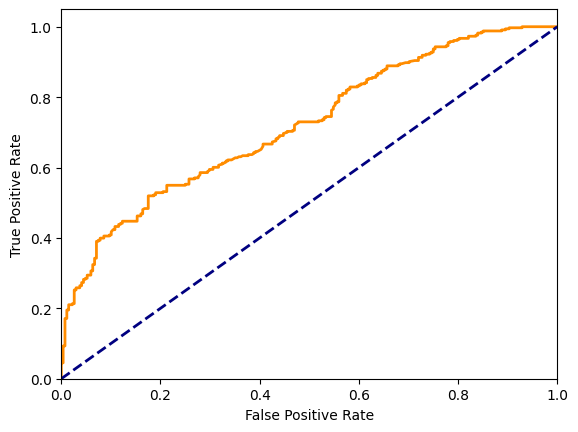

In [49]:
plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print("Area Under Curve (AUC):", roc_auc)
print()

In [58]:
import streamlit as st

# Assuming 'model' is already imported and is the sentiment analysis model
# from model_module import model


def predict_sentiment(text):
    prediction = model.predict([text])[0]  # Assume the model returns an array-like structure
    return "Positive" if prediction > threshold else "Negative"

def main():
    st.title("Sentiment Analysis App")  # Using st.title correctly
    user_input = st.text_area("Enter Text Here:", "Type here...")  # Correct function name
    if st.button("Analyze"):
        sentiment = predict_sentiment(user_input)
        st.write(f"Sentiment: {sentiment}")

if __name__ == '__main__':
    main()


AttributeError: module 'streamlit' has no attribute 'button'

In [62]:
!streamlit run C:\Users\harsh\PycharmProjects\Full_Libraries\Lib\site-packages\ipykernel_launcher.py